## Python statistics essential training - 03_05_morevariables


Standard imports


In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv("gapminder.csv")

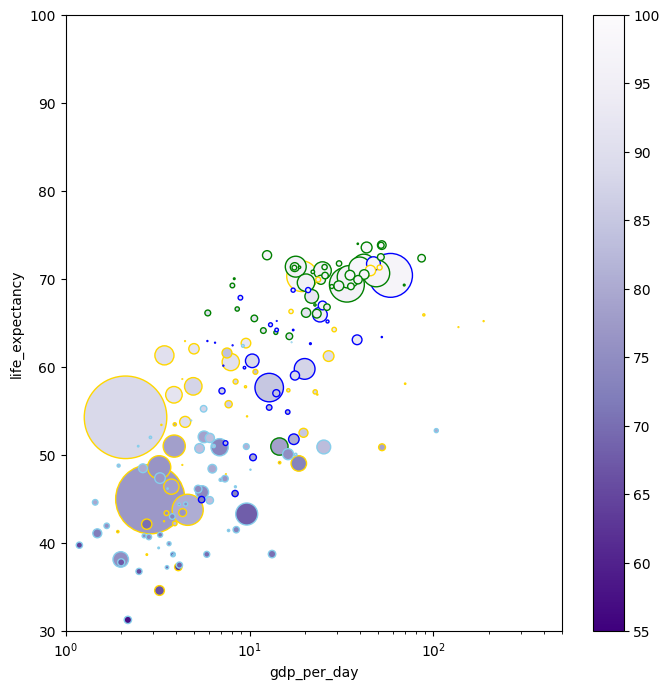

In [24]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values(
        'population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map(
        {'Africa': 'skyblue', 'Europe': 'green', 'Asia': 'gold', 'America': 'blue'})

    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area, linewidths=1,
                      edgecolors=edgecolor, c=color, colormap=matplotlib.colormaps['Purples_r'], vmin=55, vmax=100, figsize=(8, 8))

    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)


plotyear(1965)

In [25]:
interact(plotyear, year=range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [26]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [27]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

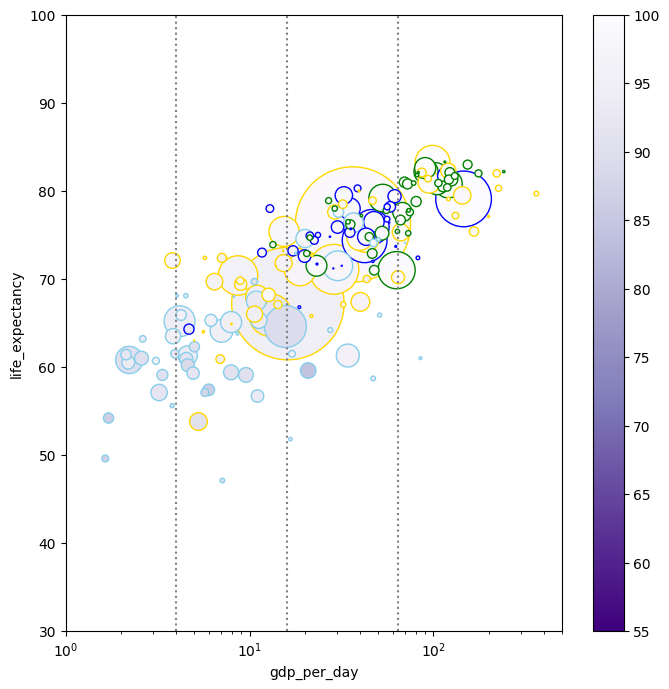

In [29]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values(
        'population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map(
        {'Africa': 'skyblue', 'Europe': 'green', 'Asia': 'gold', 'America': 'blue'})

    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area, linewidths=1,
                      edgecolors=edgecolor, c=color, colormap=matplotlib.colormaps['Purples_r'], vmin=55, vmax=100, figsize=(8, 8))
    for level in [4, 16, 64]:
        pp.axvline(level, linestyle=':', color='grey')

    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)


plotyear(2015)

In [30]:
interact(plotyear, year=range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

array([[<Axes: xlabel='gdp_per_day', ylabel='gdp_per_day'>,
        <Axes: xlabel='life_expectancy', ylabel='gdp_per_day'>,
        <Axes: xlabel='age5_surviving', ylabel='gdp_per_day'>,
        <Axes: xlabel='babies_per_woman', ylabel='gdp_per_day'>],
       [<Axes: xlabel='gdp_per_day', ylabel='life_expectancy'>,
        <Axes: xlabel='life_expectancy', ylabel='life_expectancy'>,
        <Axes: xlabel='age5_surviving', ylabel='life_expectancy'>,
        <Axes: xlabel='babies_per_woman', ylabel='life_expectancy'>],
       [<Axes: xlabel='gdp_per_day', ylabel='age5_surviving'>,
        <Axes: xlabel='life_expectancy', ylabel='age5_surviving'>,
        <Axes: xlabel='age5_surviving', ylabel='age5_surviving'>,
        <Axes: xlabel='babies_per_woman', ylabel='age5_surviving'>],
       [<Axes: xlabel='gdp_per_day', ylabel='babies_per_woman'>,
        <Axes: xlabel='life_expectancy', ylabel='babies_per_woman'>,
        <Axes: xlabel='age5_surviving', ylabel='babies_per_woman'>,
        <Ax

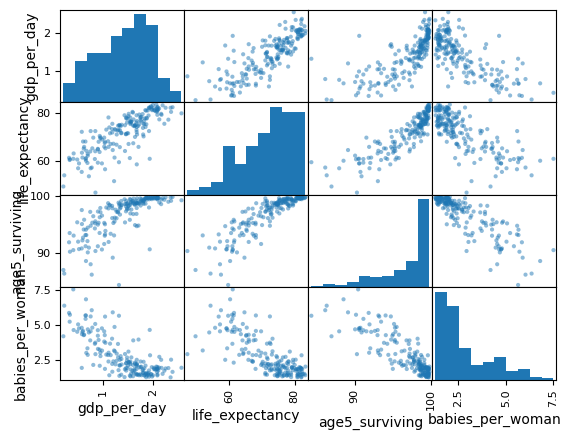

In [33]:
gapminder['gdp_per_day'] = np.log10(data['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015, ['gdp_per_day',
                                              'life_expectancy', 'age5_surviving', 'babies_per_woman']]
pd.plotting.scatter_matrix(data)